In [1]:
!pip install numpy
!pip install ucimlrepo

 # Binary Logistic Regression Dataset

## Loading Breast Cancer Wisconsin (Diagnostic)

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
breast_cancer_X = breast_cancer_wisconsin_diagnostic.data.features
breast_cancer_y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)
#print(breast_cancer_y.head())

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

# Multiclass classification Dataset

## Wine dataset

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
wine_X = wine.data.features
wine_y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

# Debugging wine_X
print("=== wine_X Debugging ===")
print("Type of wine_X:", type(wine_X))
print("Shape of wine_X:", wine_X.shape if hasattr(wine_X, 'shape') else "No shape attribute")
print("Columns in wine_X:", wine_X.columns if isinstance(wine_X, pd.DataFrame) else "Not a DataFrame")
print("First few rows of wine_X:\n", wine_X.head() if isinstance(wine_X, pd.DataFrame) else wine_X[:5])

# Debugging wine_y
print("\n=== wine_y Debugging ===")
print("Type of wine_y:", type(wine_y))
print("Shape of wine_y:", wine_y.shape if hasattr(wine_y, 'shape') else "No shape attribute")
print("First few rows of wine_y:\n", wine_y.head() if isinstance(wine_y, pd.DataFrame) else wine_y[:5])
print("Unique values in wine_y:", np.unique(wine_y))


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

# Preprocess the data

### Preprosessing

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

def preprocess_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def encode_target(y):
    # Handle DataFrame or Series
    if isinstance(y, pd.DataFrame):
        # Select the first column if DataFrame
        y_series = y.iloc[:, 0]
    else:
        y_series = pd.Series(y)

    le = LabelEncoder()
    y_encoded = le.fit_transform(y_series.values.ravel())
    #print("Encoded classes:", le.classes_)
    return y_encoded

def preprocessing(X, y, one_hot=False):
    # Standardize features
    X_scaled = StandardScaler().fit_transform(X)

    # Encode target labels
    if one_hot:
        # One-hot encode multi-class labels
        y_encoded = pd.get_dummies(y.iloc[:, 0]).astype(int).values
    else:
        # Binary classification: Convert labels to 0 and 1
        y_encoded = LabelEncoder().fit_transform(y.values.ravel())

    return X_scaled, y_encoded

X_bc_pre_drop, y_bc_pre_drop = preprocessing(breast_cancer_X, breast_cancer_y)
X_wine_pre_drop, y_wine_pre_drop = preprocessing(wine_X, wine_y, one_hot=True)

#print(y_bc)
#print(y_wine)

### Feature Importance using weights

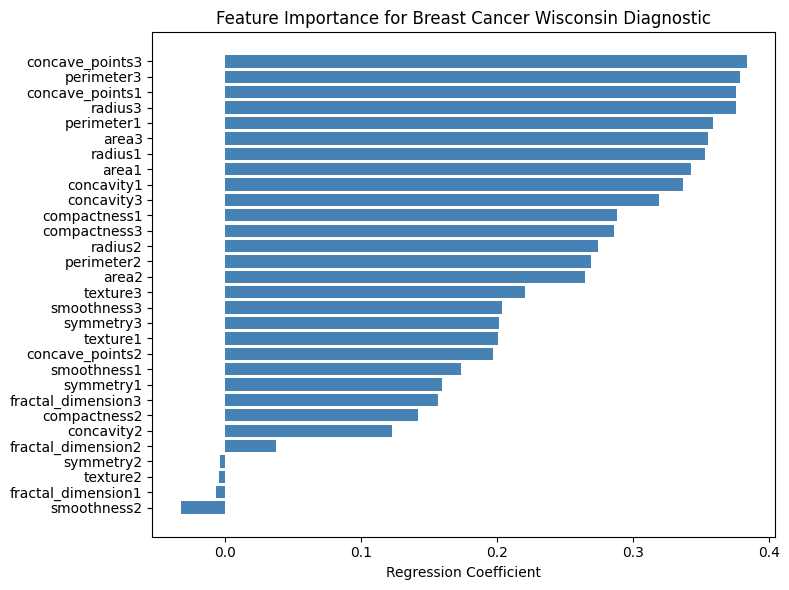


Features to drop in Breast Cancer Wisconsin Diagnostic (Threshold = 0.05): ['fractal_dimension1', 'texture2', 'smoothness2', 'symmetry2', 'fractal_dimension2']
New shape after feature removal: (569, 25)


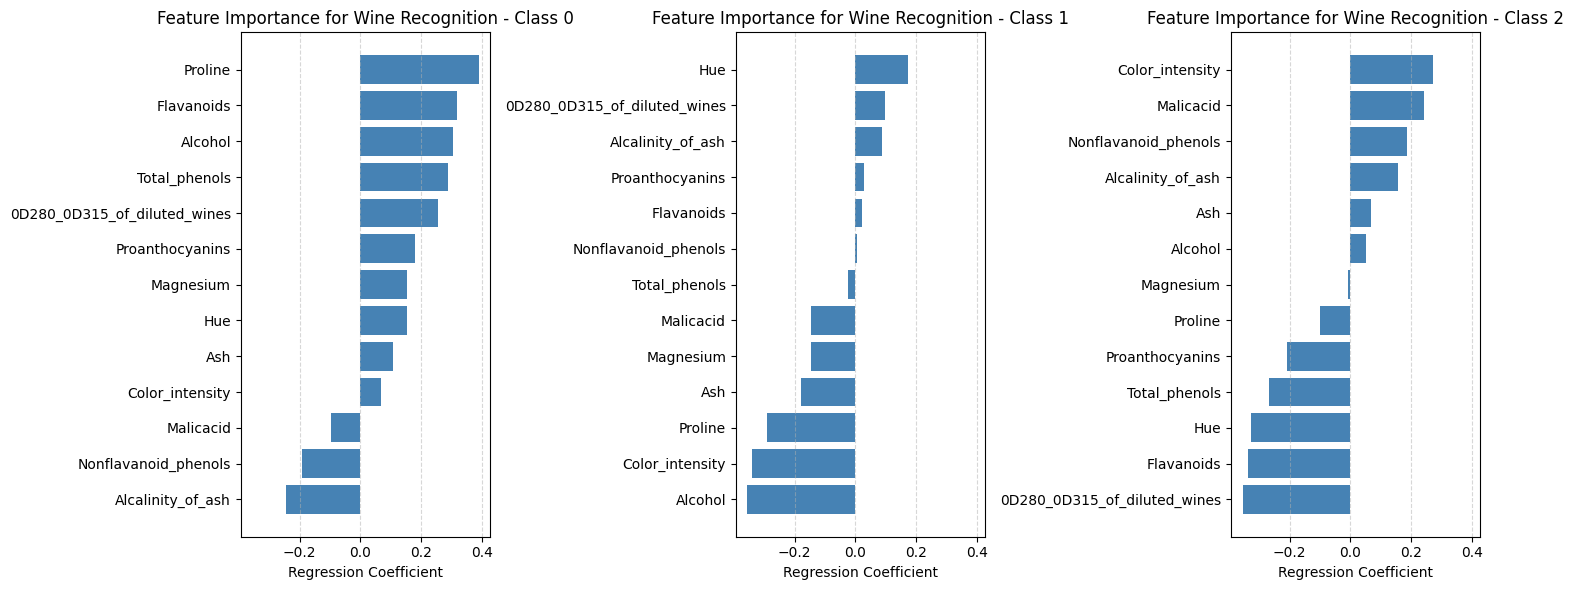


Features to drop in Wine Recognition (Threshold = 0.05): []
New shape after feature removal: (178, 13)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute regression coefficients
def compute_regression_coefficients(X_scaled, y_encoded):
    N = X_scaled.shape[0]
    if len(y_encoded.shape) > 1 and y_encoded.shape[1] > 1:
        # Multiclass: Y is already one-hot encoded
        W = (X_scaled.T @ y_encoded) / N  # Shape: (D x C)
        return W, list(range(y_encoded.shape[1]))  # Return class indices
    else:
        # Binary classification
        w = (X_scaled.T @ y_encoded) / N
        return w, None

# Function to plot feature importance
def plot_feature_importance(feature_names, coefficients, classes=None, title="Feature Importance"):
    if classes is None:
        # Binary classification
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coefficients
        }).sort_values(by='Coefficient', ascending=False)

        plt.figure(figsize=(8, 6))
        plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color="steelblue")
        plt.xlabel('Regression Coefficient')
        plt.title(title)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    else:
        # Multiclass case: plot for each class in side-by-side subplots
        num_classes = len(classes)
        fig, axes = plt.subplots(1, num_classes, figsize=(15, 6), sharex=True)

        for i, cls in enumerate(classes):
            feature_importance = pd.DataFrame({
                'Feature': feature_names,
                'Coefficient': coefficients[:, i]
            }).sort_values(by='Coefficient', ascending=False)

            axes[i].barh(feature_importance['Feature'], feature_importance['Coefficient'], color="steelblue")
            axes[i].set_xlabel("Regression Coefficient")
            axes[i].set_title(f"{title} - Class {cls}")
            axes[i].invert_yaxis()
            axes[i].grid(axis="x", linestyle="--", alpha=0.5)

        plt.tight_layout()
        plt.show()

# Function to select and drop low-importance features
def select_low_importance_features(coefficients, feature_names, threshold=0.05):
    if len(coefficients.shape) == 1:
        # Binary classification
        low_importance = np.abs(coefficients) < threshold
    else:
        # Multiclass: Sum absolute importance across classes
        low_importance = np.abs(coefficients).mean(axis=1) < threshold

    features_to_drop = [name for idx, name in enumerate(feature_names) if low_importance[idx]]
    return features_to_drop

# Function to analyze feature importance and drop features dynamically
def feature_importance(X_scaled, y_encoded, dataset_name, feature_names, threshold=0.05):
    # Ensure y_encoded is 1D for binary classification
    if len(y_encoded.shape) > 1 and y_encoded.shape[1] == 1:
        y_encoded = y_encoded.ravel()

    # Compute regression coefficients
    coefficients, classes = compute_regression_coefficients(X_scaled, y_encoded)

    # Plot feature importance
    plot_feature_importance(feature_names, coefficients, classes, title=f"Feature Importance for {dataset_name}")

    # Select and drop low-importance features
    features_to_drop = select_low_importance_features(coefficients, feature_names, threshold=threshold)
    print(f"\nFeatures to drop in {dataset_name} (Threshold = {threshold}): {features_to_drop}")

    # Ensure we are dropping only existing features
    remaining_features = [f for f in feature_names if f not in features_to_drop]

    # Drop low-importance features safely
    X_filtered = pd.DataFrame(X_scaled, columns=feature_names).drop(columns=features_to_drop, errors="ignore")

    print(f"New shape after feature removal: {X_filtered.shape}")

    # Return updated dataset and **new updated feature names**
    return X_filtered.to_numpy(), y_encoded, remaining_features

# Ensure original feature names are stored before any modifications
feature_names_bc = list(breast_cancer_X.columns)
feature_names_wine = list(wine_X.columns)

# Apply feature selection to a separate copy of the dataset
X_bc, y_bc, feature_names_bc = feature_importance(X_bc_pre_drop, y_bc_pre_drop, "Breast Cancer Wisconsin Diagnostic", feature_names_bc)
X_wine, y_wine, feature_names_wine = feature_importance(X_wine_pre_drop, y_wine_pre_drop, "Wine Recognition", feature_names_wine)


In [6]:
# Define the features to drop
features_to_drop_bc = ['fractal_dimension1', 'texture2', 'smoothness2', 'symmetry2', 'fractal_dimension2']

# If running for the first time, store the original feature names
if "feature_names_bc" not in globals():
    feature_names_bc = list(breast_cancer_X.columns)  # Store original feature names before preprocessing

# Ensure the feature names list updates dynamically
feature_names_bc = [f for f in feature_names_bc if f not in features_to_drop_bc]

# Convert X_bc to DataFrame with the updated feature names
X_bc_filtered = pd.DataFrame(X_bc, columns=feature_names_bc)

# Print before modifying X_bc
print("Original shape:", X_bc.shape)
print("New shape after feature removal:", X_bc_filtered.shape)

# Convert back to NumPy for further processing
X_bc = X_bc_filtered.to_numpy()


Original shape: (569, 25)
New shape after feature removal: (569, 25)


# Task 2

## Linear regression

This implementation supports both binary and multi-class linear regression.

In [7]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y, rcond=None)[0]          #return w for the least square difference
        return self

    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

    def predict_proba(self, x):
        yh = self.predict(x)

        # If multi-class (more than 1 class), we use softmax for probabilities
        if len(yh.shape) > 1 and yh.shape[1] > 1:
            return self.softmax(yh)

        # For binary classification, apply sigmoid
        return 1 / (1 + np.exp(-yh))

    def softmax(self, x):
        # Apply softmax function for multi-class classification
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Task 3

## Logistic Regression

In [8]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.losses = []

    def gradient(self, x, y):
        N,D = x.shape
        logistic = lambda z: 1./ (1 + np.exp(-np.clip(z, -500, 500)))       # (sigmoid) logistic function
        sigmoid = logistic(np.dot(x, self.w))                # predictions  size N
        grad = np.dot(x.T, sigmoid - y)/N                    # divide by N because cost is mean over N points
        return grad

    def fit(self, x, y):
      if x.ndim == 1:
          x = x[:, None]
      if self.add_bias:
          N = x.shape[0]
          x = np.column_stack([x,np.ones(N)])
      N,D = x.shape
      self.w = np.zeros(D)
      g = np.inf
      t = 0
      # gradient descent\
      self.losses = []

      while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
          g = self.gradient(x, y)
          self.w = self.w - self.learning_rate * g
          loss = self.cross_entropy(x, y)
          self.losses.append(loss)
          t += 1

      if self.verbose:
          print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
          print(f'the weight found: {self.w}')
      return self

    def predict_proba(self, x):
      """Returns probabilities instead of class labels."""
      logistic = lambda z: 1. / (1 + np.exp(-np.clip(z, -500, 500)))  # Safe sigmoid function
      if x.ndim == 1:
          x = x[:, None]
      if self.add_bias:
          x = np.column_stack([x, np.ones(x.shape[0])])  # Add bias term
      return logistic(np.dot(x, self.w))  # Return probabilities

    def predict(self, x, threshold=0.5):
      """Returns binary class predictions based on a threshold."""
      return (self.predict_proba(x) >= threshold).astype(int)


    def cross_entropy(self, x, y):
      """Computes cross-entropy loss."""
      sigmoid = lambda z: 1. / (1 + np.exp(-np.clip(z, -500, 500)))
      preds = sigmoid(np.dot(x, self.w))
      return -np.mean(y * np.log(preds + 1e-9) + (1 - y) * np.log(1 - preds + 1e-9))

    def gradient_check(self, x, y, epsilon=1e-5):
        """Performs gradient checking for logistic regression."""
        if x.ndim == 1:
          x = x[:, None]
        if self.add_bias:
          x = np.column_stack([x, np.ones(x.shape[0])])  # Ensure bias is included

        analytical_grad = self.gradient(x, y)
        numerical_grad = np.zeros_like(analytical_grad)
        perturb = np.zeros_like(analytical_grad)

        for i in range(len(self.w)):
            perturb[i] = epsilon

            self.w += perturb
            loss1 = self.cross_entropy(x, y)

            self.w -= 2 * perturb
            loss2 = self.cross_entropy(x, y)

            numerical_grad[i] = (loss1 - loss2) / (2 * epsilon)
            self.w += perturb
            perturb[i] = 0  # Reset perturbation

        diff = np.linalg.norm(analytical_grad - numerical_grad) / (np.linalg.norm(analytical_grad) + np.linalg.norm(numerical_grad))
        print(f"Binary Logistic Regression Gradient Check Passed! Difference: {diff:.6e}" if diff < 1e-6 else f"Gradient Check Failed! Difference: {diff:.6e}")

    def plot_training_loss(self):
      """Plots the training loss over iterations."""
      plt.plot(self.losses)
      plt.xlabel("Iterations")
      plt.ylabel("Cross-Entropy Loss")
      plt.title("Training Loss for Binary Logistic Regression")
      plt.show()



## Multiclass Logistic Regression

In [9]:
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
      self.W = np.random.rand(nFeatures, nClasses)

    def predict(self, X):
      y_pred = np.exp(np.matmul(X, self.W))
      return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)

    def grad(self, X, y):
      return np.matmul(X.transpose(), self.predict(X) - y)

    def ce(self, X, y):
      return -np.sum(y * np.log(self.predict(X)))

    def score(self, X, y):
      """Implements scoring method for cross-validation."""
      y_pred = self.predict(X).argmax(axis=1) + 1  # Convert one-hot back to class labels
      return accuracy_score(y.idxmax(axis=1), y_pred)

    def cross_entropy(self, X, y):
      """Computes cross-entropy loss."""
      return -np.sum(y * np.log(self.predict(X) + 1e-9))

    # modify it to add stopping criteria (what can you think of?)
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100, tol=1e-6):
        self.losses_train = np.zeros(niter)
        self.losses_valid = np.zeros(niter) if X_valid is not None else None
        for i in range(niter):
          self.W = self.W - lr * self.grad(X, y)
          loss_train = self.ce(X, y)
          self.losses_train[i] = loss_train
          if X_valid is not None and y_valid is not None:
              loss_valid = self.ce(X_valid, y_valid)
              self.losses_valid[i] = loss_valid
              # print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
          #else:
              # print(f"iter {i}: {loss_train:.3f}")

          # Stopping criteria: if the loss change is small, stop early
          if i > 0 and abs(self.losses_train[i] - self.losses_train[i - 1]) < tol:
            print(f"Stopping early at iteration {i}, loss change < {tol}")
            break
        return self.losses_train[:i+1], self.losses_valid[:i+1] if self.losses_valid is not None else None

    def check_grad(self, X, y):
        N, C = y.shape
        D = X.shape[1]

        diff = np.zeros((D, C))

        W = self.W.copy()

        for i in range(D):
          for j in range(C):
            epsilon = np.zeros((D, C))
            epsilon[i, j] = np.random.rand() * 1e-4

            self.W = self.W + epsilon
            J1 = self.ce(X, y)
            self.W = W

            self.W = self.W - epsilon
            J2 = self.ce(X, y)
            self.W = W

            numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
            derived_grad = self.grad(X, y)[i, j]

            diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                          np.square(derived_grad + numeric_grad).sum()


        diff_sum = diff.sum()
        print(f"Multi class Regression Gradient Check Passed! Difference: {diff_sum:.6e}" if diff_sum < 1e-6 else f"Gradient Check Failed! Difference: {diff_sum:.6e}")

        return diff.sum()

    def plot_training_loss(self):
      """Plots the training loss for multinomial logistic regression."""
      plt.plot(self.losses_train, color="blue")

      plt.xlabel("Iterations")
      plt.ylabel("Cross-Entropy Loss")
      plt.title("Training Loss for Multinomial Logistic Regression")

      plt.show()


# Task 4

## 4.2.a

### Multiple-Linear Regression on Breast Cancer Dataset

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

0.99475925319358


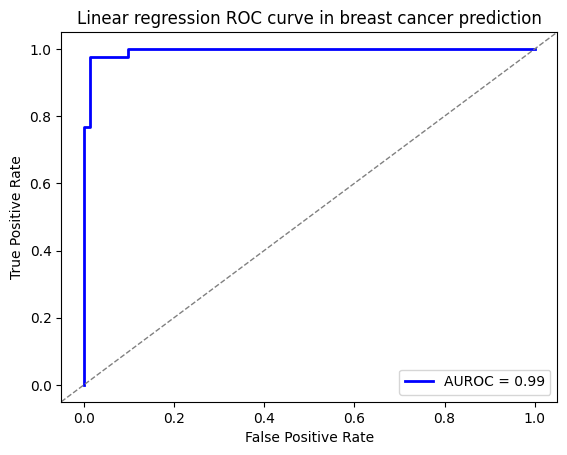

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

print(roc_auc)
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear regression ROC curve in breast cancer prediction')
plt.legend(loc="best")

### Binary Logistic Regression on Breast Cancer Dataset

terminated after 100000 iterations, with norm of the gradient equal to 0.0022924844908245997
the weight found: [ 0.44319224  0.27501217  0.35841896  0.51864017 -0.06815316 -1.56254825
  1.04665208  1.71114277 -0.85036194  2.1472482   0.87090894  1.59462333
 -1.51312945 -0.60443602  0.77134687  1.43951656  2.03414586  0.90707738
  1.37916043  1.24122332  0.02140027  1.86526058  1.51476634  1.66645412
 -0.11618502  0.1073519 ]
0.9967245332459875


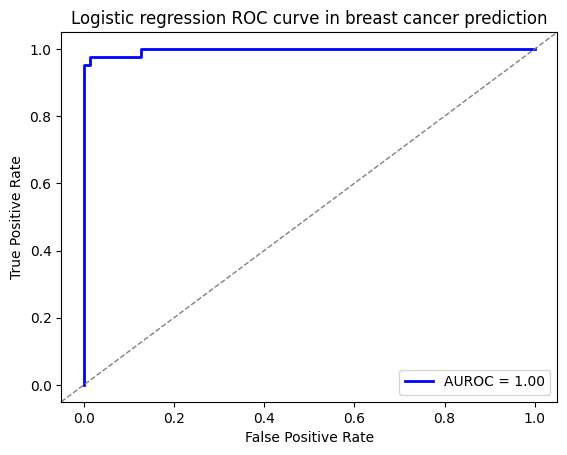

In [12]:
model = LogisticRegression(learning_rate=0.01, verbose=True)
model.fit(X_train, y_train.ravel())

y_pred_proba = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

print(roc_auc)
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression ROC curve in breast cancer prediction')
plt.legend(loc="best")

## 4.2b

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

### Multiple linear regression

In [14]:
# Converts one-hot to labels and treat them as continous values
y_train_categorical = np.argmax(y_train, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)

# --- Train Multiple Linear Regression ---
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train_categorical)

# Predict & Convert to Class Labels
mlr_preds_continuous = mlr_model.predict(X_test)

mlr_preds_class = np.round(mlr_preds_continuous).astype(int)

mlr_preds_class = np.clip(mlr_preds_class, 0, np.max(y_train_categorical))

mlr_accuracy = accuracy_score(y_test_categorical, mlr_preds_class)

print(f"Wine - Multiple Linear Regression Accuracy: {mlr_accuracy:.4f}")

Wine - Multiple Linear Regression Accuracy: 0.9167


## Multivariate Linear Regression (Predicting One-Hot Encoded Class Labels)

In [15]:
mvlr_model = LinearRegression()
mvlr_model.fit(X_train, y_train)  # Predicts all one-hot encoded columns

mvlr_preds = mvlr_model.predict(X_test)
mvlr_preds_class = np.argmax(mvlr_preds, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

mvlr_accuracy = accuracy_score(y_test_labels, mvlr_preds_class)
print(f"Wine - Multivariate Linear Regression Accuracy: {mvlr_accuracy:.4f}")

Wine - Multivariate Linear Regression Accuracy: 1.0000


## Multi-Class Logistic Regression (Predicting Wine Class with Probabilities)

In [16]:
log_model = Multinomial_logistic(nFeatures=X_train.shape[1], nClasses=y_train.shape[1])
log_model.fit(X_train, y_train, lr=0.01, niter=500)

log_preds = log_model.predict(X_test)
log_preds_class = np.argmax(log_preds, axis=1)

log_accuracy = accuracy_score(y_test_labels, log_preds_class)
print(f"Wine - Multi-Class Logistic Regression Accuracy: {log_accuracy:.4f}")

Wine - Multi-Class Logistic Regression Accuracy: 1.0000


## 4.3

logistic reg

Binary Logistic Regression Gradient Check Passed! Difference: 9.956838e-08


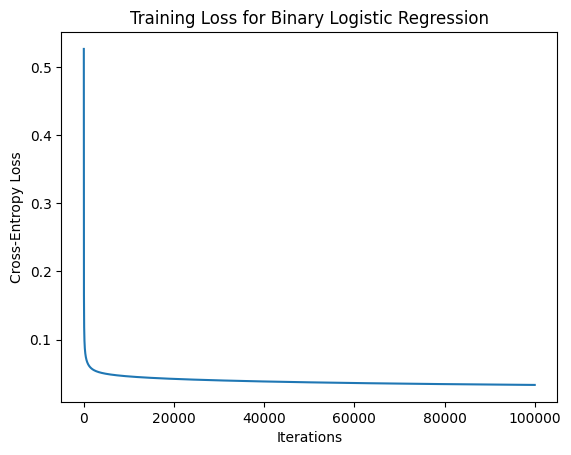

In [17]:
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42
)
y_train_bc = np.array(y_train_bc).flatten()
y_test_bc = np.array(y_test_bc).flatten()

# Train Binary Logistic Regression on Breast Cancer Dataset
binary_model = LogisticRegression()
binary_model.fit(X_train_bc, y_train_bc)

# Verify Gradient Checking
binary_model.gradient_check(X_train_bc, y_train_bc)

# This is to help visualizing the loss
binary_model.plot_training_loss()

Multi logistical

Multi class Regression Gradient Check Passed! Difference: 6.636411e-15


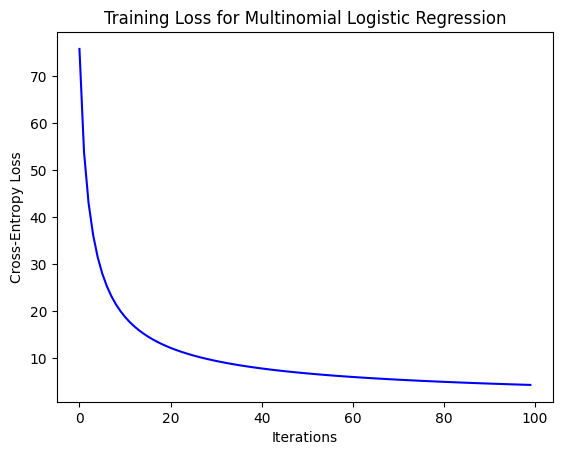

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

mlr_model = Multinomial_logistic(nFeatures=X_train.shape[1], nClasses=y_train.shape[1])
loss_train, loss_valid = mlr_model.fit(X_train, y_train, X_valid=X_test, y_valid=y_test)

grad_difference = mlr_model.check_grad(X_train, y_train)

# This is to help visualizing the loss
mlr_model.plot_training_loss()


##4.4 Train Test Validation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Split Data into Train (70%), Validation (15%), and Test (15%)
def split_data(X, y, test_size=0.15, val_size=0.15, random_state=42):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size + val_size, random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + val_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Example: Splitting Breast Cancer Data
X_train_bc, X_val_bc, X_test_bc, y_train_bc, y_val_bc, y_test_bc = split_data(X_bc, y_bc)

# Train and Validate Binary Logistic Regression with Hyperparameter Tuning
best_val_auc = 0
best_lr = None
best_iters = None
for lr in [0.001, 0.01, 0.1, 1]:
    for max_iters in [100, 1000, 10000]:
        binary_model = LogisticRegression(learning_rate=lr, max_iters=max_iters)
        binary_model.fit(X_train_bc, y_train_bc.ravel())

        y_val_pred_proba = binary_model.predict_proba(X_val_bc)
        val_auc = roc_auc_score(y_val_bc, y_val_pred_proba)
        # print(f"Validation AUROC (lr={lr}, max_iters={max_iters}): {val_auc:.4f}")

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            best_binary_model = binary_model
            best_lr = lr
            best_iters = max_iters

print(f"Best hyperparameters for Binary Logistic Regression: lr={best_lr}, max_iters={best_iters}, AUROC: {best_val_auc:.4f}")

# Train and Validate Multiclass Logistic Regression with Hyperparameter Tuning
X_train_wine, X_val_wine, X_test_wine, y_train_wine, y_val_wine, y_test_wine = split_data(X_wine, y_wine)

best_val_acc = 0
best_lr_multi = None
best_iters_multi = None
for lr in [0.001, 0.01, 0.1, 1]:
    for max_iters in [100, 1000, 10000]:
        multi_class_model = Multinomial_logistic(nFeatures=X_train_wine.shape[1], nClasses=y_train_wine.shape[1])
        train_losses, val_losses = multi_class_model.fit(X_train_wine, y_train_wine, lr=lr, niter=max_iters)

        y_val_pred = multi_class_model.predict(X_val_wine).argmax(axis=1) + 1
        val_acc = accuracy_score(y_val_wine.argmax(axis=1) + 1, y_val_pred)
        # print(f"Validation Accuracy (lr={lr}, max_iters={max_iters}): {val_acc:.4f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_multi_class_model = multi_class_model
            best_lr_multi = lr
            best_iters_multi = max_iters

print(f"Best hyperparameters for Multiclass Logistic Regression: lr={best_lr_multi}, max_iters={best_iters_multi}, Accuracy: {best_val_acc:.4f}")

# Evaluate Best Models on Test Set
y_test_pred_proba = best_binary_model.predict_proba(X_test_bc)
test_auc = roc_auc_score(y_test_bc, y_test_pred_proba)
print(f"Test AUROC (Binary Logistic Regression): {test_auc:.4f}")

y_test_pred = best_multi_class_model.predict(X_test_wine).argmax(axis=1) + 1
test_acc = accuracy_score(y_test_wine.argmax(axis=1) + 1, y_test_pred)
print(f"Test Accuracy (Multiclass Logistic Regression): {test_acc:.4f}")


Best hyperparameters for Binary Logistic Regression: lr=0.001, max_iters=10000, AUROC: 0.9977
Stopping early at iteration 3322, loss change < 1e-06


<ipython-input-9-5d96b6961af6>:13: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(self.predict(X)))
<ipython-input-9-5d96b6961af6>:13: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(self.predict(X)))
<ipython-input-9-5d96b6961af6>:13: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(self.predict(X)))
<ipython-input-9-5d96b6961af6>:13: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(self.predict(X)))
<ipython-input-9-5d96b6961af6>:13: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(self.predict(X)))
<ipython-input-9-5d96b6961af6>:13: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(self.predict(X)))


Best hyperparameters for Multiclass Logistic Regression: lr=0.001, max_iters=100, Accuracy: 0.9630
Test AUROC (Binary Logistic Regression): 1.0000
Test Accuracy (Multiclass Logistic Regression): 0.9630


##4.5 Linear vs Logistic Regression Comparison

> Add blockquote



### Binary Classification (Linear Regression vs Logistic Regression)

In [20]:
# Split the data into training and test sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Custom Linear Regression Model (from previous code)
model_lr = LinearRegression(add_bias=True)
model_lr = model_lr.fit(X_train_bc, y_train_bc)

# Linear Regression Predictions (probabilities via sigmoid)
y_pred_proba_lr = model_lr.predict_proba(X_test_bc)

# Logistic Regression Model
model_logreg = LogisticRegression(learning_rate=0.001, max_iters=10000) # best hyperparemeters found in #4
model_logreg.fit(X_train_bc, y_train_bc)

# Logistic Regression Predictions (probabilities)
y_pred_proba_logreg = model_logreg.predict_proba(X_test_bc)

# Calculate AUROC for both models
auroc_lr = roc_auc_score(y_test_bc, y_pred_proba_lr)
auroc_logreg = roc_auc_score(y_test_bc, y_pred_proba_logreg)

# Output the results
print("Linear Regression AUROC:", auroc_lr)
print("Logistic Regression AUROC:", auroc_logreg)

Linear Regression AUROC: 0.99475925319358
Logistic Regression AUROC: 0.9983622666229938


<a name="multi"></a>
### Multi-Class Classification (Multivariate Linear Regression vs Multi-Class Logistic Regression)

In [21]:
# Train-test split
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

# Custom Linear Regression Model (from previous code)
model_lr = LinearRegression(add_bias=True)
model_lr = model_lr.fit(X_train_wine, y_train_wine)

# Linear Regression Predictions (probabilities via sigmoid)
y_pred_lr = model_lr.predict_proba(X_test_wine).argmax(axis=1) + 1
lr_acc = accuracy_score(y_test_wine.argmax(axis=1) + 1, y_pred_lr)
print("Multivariate Linear Regression Accuracy:", lr_acc)

# Train Multi-Class Logistic Regression
model_multilogreg = Multinomial_logistic(nFeatures=X_train_wine.shape[1], nClasses=y_train_wine.shape[1])
model_multilogreg.fit(X_train_wine, y_train_wine, lr=0.005, niter=1000, tol=1e-6)

# Predict & Evaluate
y_pred = model_multilogreg.predict(X_test_wine).argmax(axis=1) + 1  # Convert probabilities to class labels
multilogreg_acc = accuracy_score(y_test_wine.argmax(axis=1) + 1, y_pred)
print("Multi-Class Logistic Regression AUROC:", multilogreg_acc)

Multivariate Linear Regression Accuracy: 1.0
Multi-Class Logistic Regression AUROC: 1.0


##4.6 Linear and Logistic regression AUROC Comparison

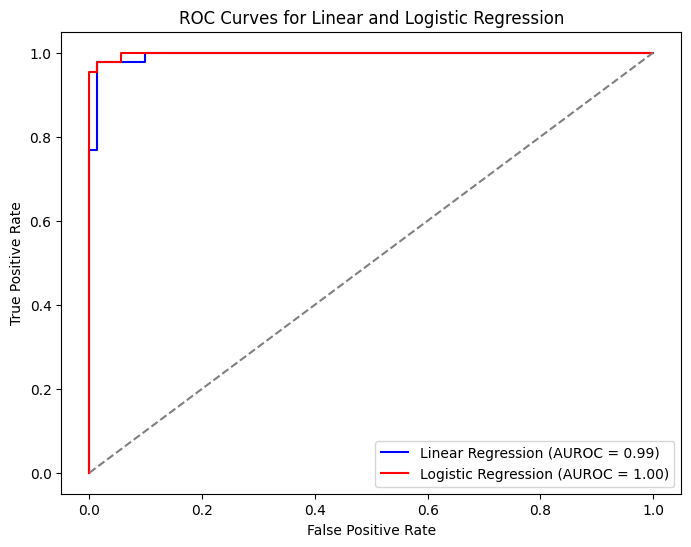

In [22]:
# Compute ROC curve for both models
fpr_lr, tpr_lr, _ = roc_curve(y_test_bc, y_pred_proba_lr)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_bc, y_pred_proba_logreg)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Linear Regression (AUROC = {auroc_lr:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='red', label=f'Logistic Regression (AUROC = {auroc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Linear and Logistic Regression')
plt.legend(loc='lower right')
plt.show()

##4.7 Multivariate Linear regression vs Multi-Class logistic regression accuracy comparison

The accuracies for the wine dataset were calculated for both the multivariate linear regression and multi-class logistic regression models in [section 4.4](#multi), and both models achieved 100% accuracy on the multi-class classification test data.

## 4.8 Comparing Binary Regression Coefficients

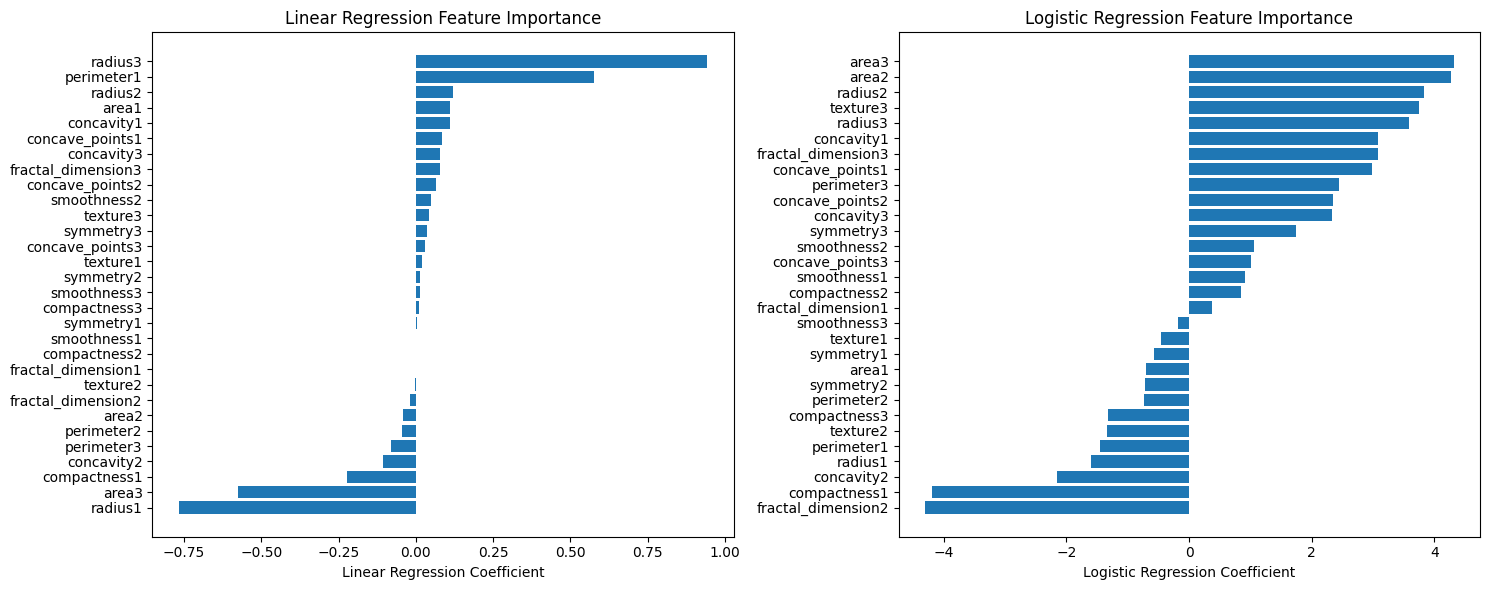

Top 5 Linear Regression Features: ['radius3', 'perimeter1', 'radius2', 'area1', 'concavity1']
Top 5 Logistic Regression Features: ['area3', 'area2', 'radius2', 'texture3', 'radius3']


In [23]:
linear_model = LinearRegression()
linear_model.fit(X_bc_pre_drop, y_bc_pre_drop )
linear_coef = linear_model.w[:-1]  # Exclude bias term

# Logistic Regression Coefficients
logistic_model = LogisticRegression()
logistic_model.fit(X_bc_pre_drop, y_bc_pre_drop )
logistic_coef = logistic_model.w[:-1] #Excluding bias

# Plotting
feature_names = breast_cancer_X.columns

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
linear_feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': linear_coef}).sort_values(by='Coefficient', ascending=False)
plt.barh(linear_feature_importance['Feature'], linear_feature_importance['Coefficient'])
plt.xlabel('Linear Regression Coefficient')
plt.title('Linear Regression Feature Importance')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
logistic_feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_coef}).sort_values(by='Coefficient', ascending=False)
plt.barh(logistic_feature_importance['Feature'], logistic_feature_importance['Coefficient'])
plt.xlabel('Logistic Regression Coefficient')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Compare Top Features
top_linear_features = linear_feature_importance['Feature'].head(5).tolist()
top_logistic_features = logistic_feature_importance['Feature'].head(5).tolist()

print("Top 5 Linear Regression Features:", top_linear_features)
print("Top 5 Logistic Regression Features:", top_logistic_features)


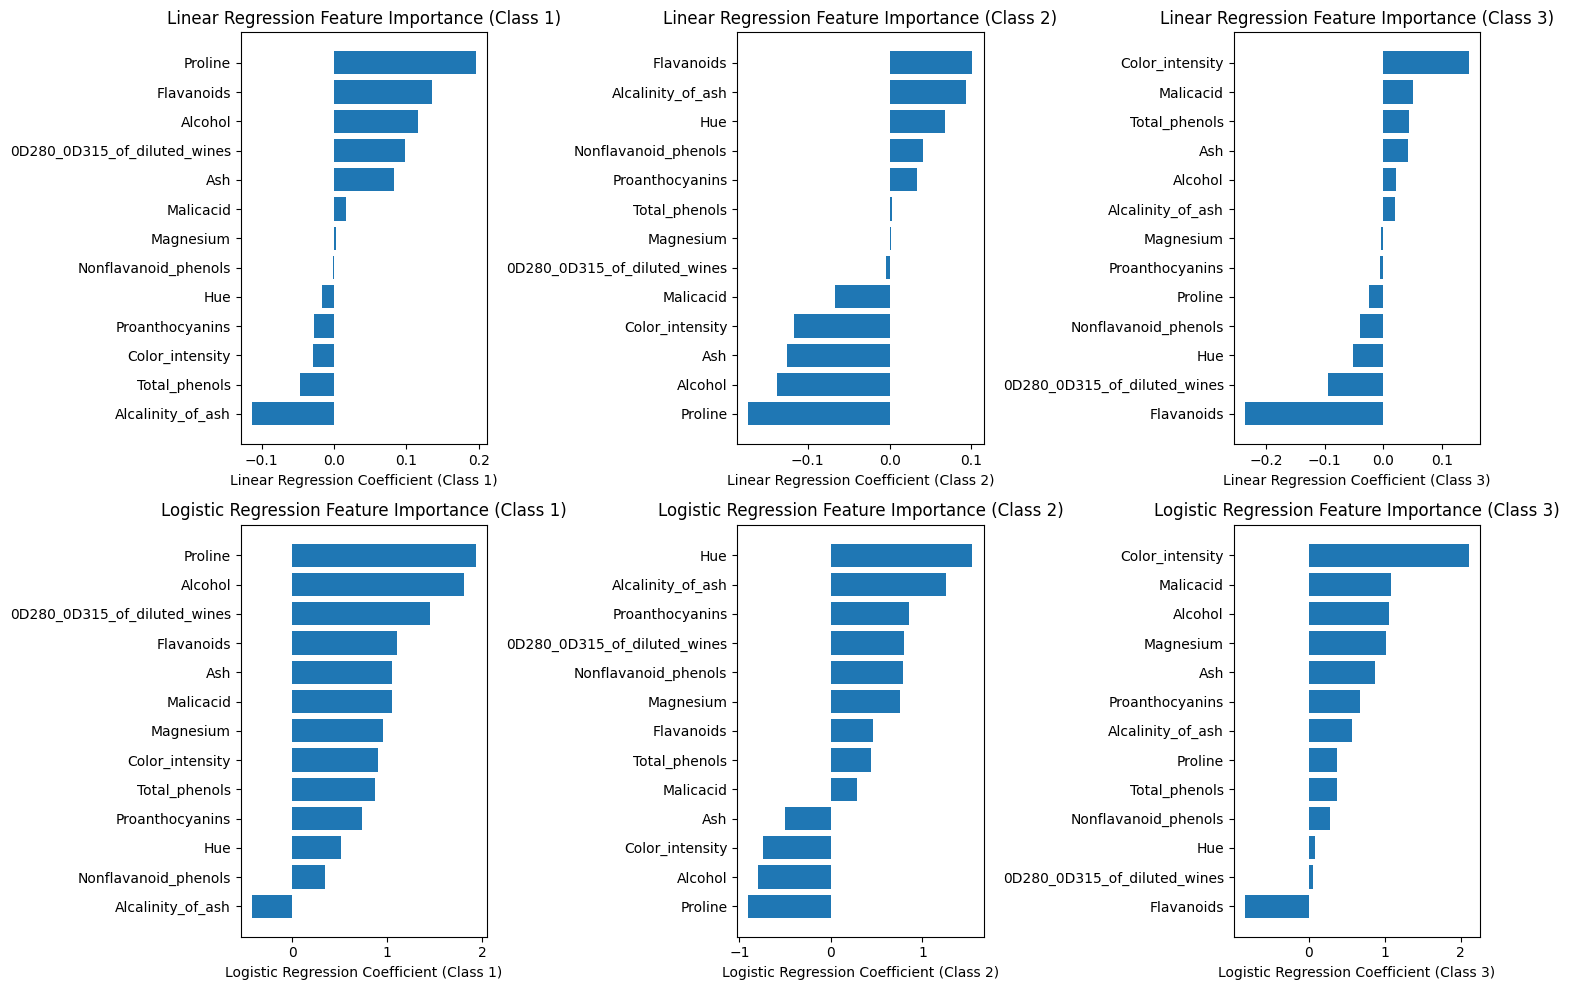

Top 5 Linear Regression Features (Class 1): ['Proline', 'Flavanoids', 'Alcohol', '0D280_0D315_of_diluted_wines', 'Ash']
Top 5 Logistic Regression Features (Class 1): ['Proline', 'Alcohol', '0D280_0D315_of_diluted_wines', 'Flavanoids', 'Ash']


In [24]:
linear_model = LinearRegression()
linear_model.fit(X_wine_pre_drop, y_wine_pre_drop)
linear_coef = linear_model.w[:-1]  # Exclude bias term

# Multinomial Logistic Regression Coefficients
logistic_model = Multinomial_logistic(X_wine.shape[1], y_wine.shape[1])
logistic_model.fit(X_wine_pre_drop, y_wine_pre_drop)
logistic_coef = logistic_model.W

# Plotting
feature_names = wine_X.columns

plt.figure(figsize=(15, 10))

# Linear Regression Plots (one for each class)
for i in range(y_wine.shape[1]):
    plt.subplot(2, 3, i + 1)
    linear_feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': linear_coef[:, i]}).sort_values(by='Coefficient', ascending=False)
    plt.barh(linear_feature_importance['Feature'], linear_feature_importance['Coefficient'])
    plt.xlabel(f'Linear Regression Coefficient (Class {i+1})')
    plt.title(f'Linear Regression Feature Importance (Class {i+1})')
    plt.gca().invert_yaxis()

# Logistic Regression Plots (one for each class)
for i in range(y_wine.shape[1]):
    plt.subplot(2, 3, i + 4)
    logistic_feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_coef[:, i]}).sort_values(by='Coefficient', ascending=False)
    plt.barh(logistic_feature_importance['Feature'], logistic_feature_importance['Coefficient'])
    plt.xlabel(f'Logistic Regression Coefficient (Class {i+1})')
    plt.title(f'Logistic Regression Feature Importance (Class {i+1})')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Compare Top Features (for one class as example)
top_linear_features = pd.DataFrame({'Feature': feature_names, 'Coefficient': linear_coef[:, 0]}).sort_values(by='Coefficient', ascending=False)['Feature'].head(5).tolist()
top_logistic_features = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_coef[:, 0]}).sort_values(by='Coefficient', ascending=False)['Feature'].head(5).tolist()

print("Top 5 Linear Regression Features (Class 1):", top_linear_features)
print("Top 5 Logistic Regression Features (Class 1):", top_logistic_features)

The top features are in fact different between linear and logistic regression. That is because linear regression models the weights by minimizing SSE while logistic regression predicts probabilities via the sigmoid/softmax. This leads to different feature importance rankings because linear regression prioritizs features with strong linear correlations, whereas logistic regression captures non-linear, class-discriminative features.

## 4.9 Comparing Coefficient Heatmaps

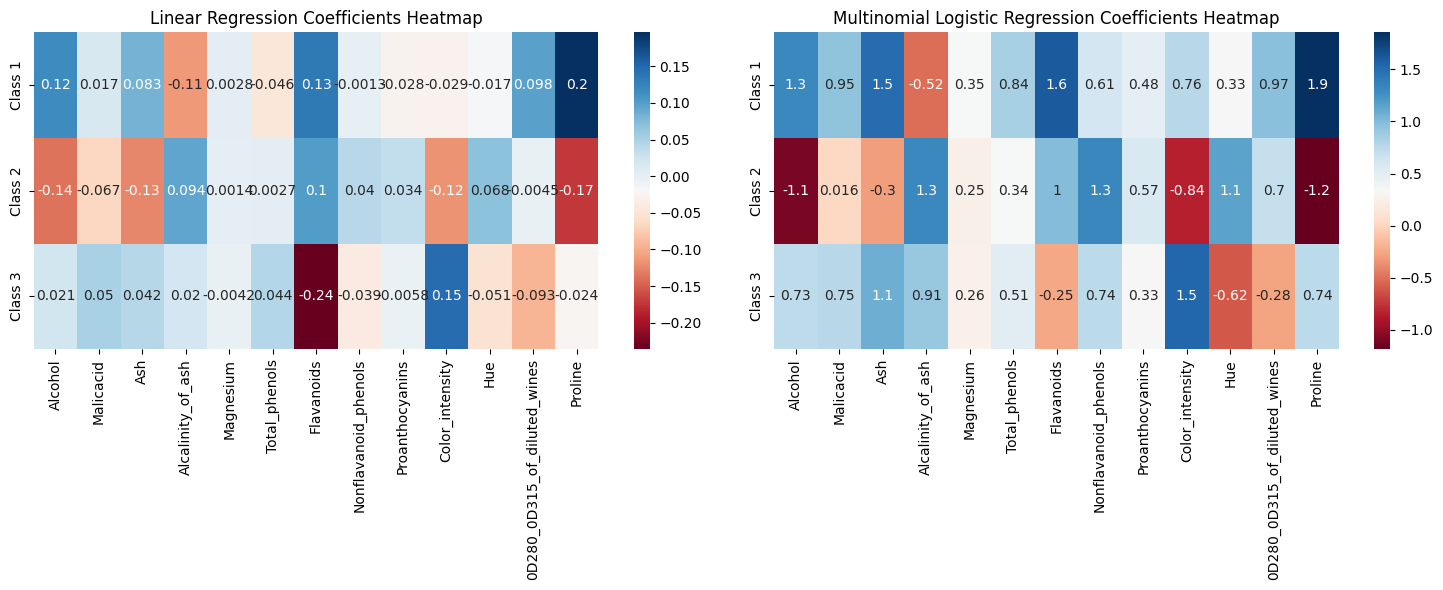

Class 1 - Linear Top Feature: Proline, Logistic Top Feature: Proline
    Top feature is the same
Class 2 - Linear Top Feature: Proline, Logistic Top Feature: Nonflavanoid_phenols
    Top feature differs
Class 3 - Linear Top Feature: Flavanoids, Logistic Top Feature: Color_intensity
    Top feature differs


In [25]:
import seaborn as sns

# Linear Regression Coefficients
linear_model = LinearRegression()
linear_model.fit(X_wine_pre_drop, y_wine_pre_drop)
linear_coef = linear_model.w[:-1]

# Multinomial Logistic Regression Coefficients
logistic_model = Multinomial_logistic(X_wine.shape[1], y_wine.shape[1])
logistic_model.fit(X_wine_pre_drop, y_wine_pre_drop)
logistic_coef = logistic_model.W

# Heatmaps
feature_names = wine_X.columns

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(linear_coef.T, annot=True, cmap='RdBu', xticklabels=feature_names, yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.title('Linear Regression Coefficients Heatmap')

plt.subplot(1, 2, 2)
sns.heatmap(logistic_coef.T, annot=True, cmap='RdBu', xticklabels=feature_names, yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.title('Multinomial Logistic Regression Coefficients Heatmap')

plt.tight_layout()
plt.show()

# Compare Top Features Per Class
for i in range(y_wine.shape[1]):
    linear_top_feature = feature_names[np.argmax(np.abs(linear_coef[:, i]))]
    logistic_top_feature = feature_names[np.argmax(np.abs(logistic_coef[:, i]))]
    print(f"Class {i+1} - Linear Top Feature: {linear_top_feature}, Logistic Top Feature: {logistic_top_feature}")
    if linear_top_feature == logistic_top_feature:
        print("    Top feature is the same")
    else:
        print("    Top feature differs")


The top features per class do indeed change. When we look at the top feature per class, we are looking at the feature that most strongly influences the prediction of that class. Because linear regression and logistic regression operate in different ways, the features that most strongly influence a prediction can be different. Linear regression looks for the strongest linear correlation, while logistic regression looks for the feature that is most useful for separating the classes. Therefore, even though both models are trying to predict the same classes, they may find that different features are most useful for doing so.

## Optional KNN and DT

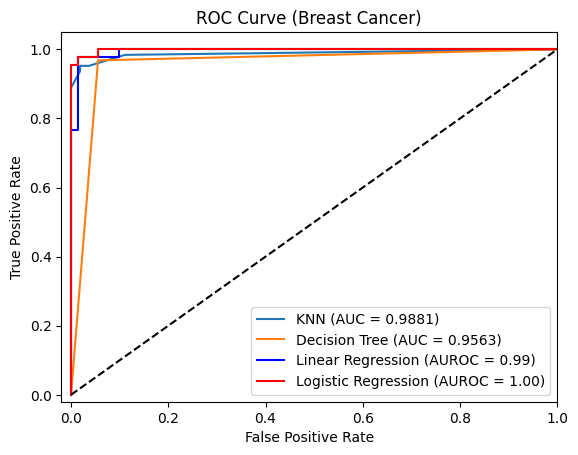

Binary Classification (Breast Cancer) Results:
KNN: Accuracy = 0.9708, ROC AUC = 0.9881
Decision Tree: Accuracy = 0.9532, ROC AUC = 0.9563

Multi-class Classification (Wine) Results:
KNN: Accuracy = 0.9630
Decision Tree: Accuracy = 0.9630


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# Split Data
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

# Train and Evaluate Models
results = {}

# Binary Classification (Breast Cancer) with ROC Curve
results['Breast Cancer'] = {}
plt.figure()
for name, model in models.items():
    model.fit(X_bc_train, y_bc_train)
    y_pred = model.predict(X_bc_test)
    y_pred_proba = model.predict_proba(X_bc_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_bc_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    results['Breast Cancer'][name] = {
        'accuracy': accuracy_score(y_bc_test, y_pred),
        'roc_auc': roc_auc
    }
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Linear Regression (AUROC = {auroc_lr:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='red', label=f'Logistic Regression (AUROC = {auroc_logreg:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])  # Shift the x-axis slightly left
plt.ylim([-0.02, 1.05])  # Shift the y-axis slightly down
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Breast Cancer)')
plt.legend(loc="lower right")
plt.show()

# Multi-class Classification (Wine)
results['Wine'] = {}
for name, model in models.items():
    model.fit(X_wine_train, y_wine_train)
    y_pred = model.predict(X_wine_test)
    results['Wine'][name] = accuracy_score(y_wine_test, y_pred)

# Print Results
print("Binary Classification (Breast Cancer) Results:")
for name, metrics in results['Breast Cancer'].items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.4f}, ROC AUC = {metrics['roc_auc']:.4f}")

print("\nMulti-class Classification (Wine) Results:")
for name, accuracy in results['Wine'].items():
    print(f"{name}: Accuracy = {accuracy:.4f}")

## Linear Transformations

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process.kernels import RBF

X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

def sigmoid_transform(X):
    return 1 / (1 + np.exp(-X))

# Polynomial Transformation
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Sigmoid Transformation
X_sigmoid_train = sigmoid_transform(X_train)
X_sigmoid_test = sigmoid_transform(X_test)

def evaluate_model(X_train_transformed, X_test_transformed, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train_transformed, y_train)

    y_pred = model.predict(X_test_transformed)
    y_pred_labels = (y_pred >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred_labels)
    return accuracy

def evaluate_model_logistic(X_train_transformed, X_test_transformed, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train_transformed, y_train)

    y_pred = model.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate Polynomial Transformation using Logistic Regression
poly_logistic_accuracy = evaluate_model_logistic(X_poly_train, X_poly_test, y_train, y_test)

# Evaluate Sigmoid Transformation using Logistic Regression
sigmoid_logistic_accuracy = evaluate_model_logistic(X_sigmoid_train, X_sigmoid_test, y_train, y_test)

# Evaluate Polynomial Transformation using Linear Regression
poly_accuracy = evaluate_model(X_poly_train, X_poly_test, y_train, y_test)

# Evaluate Sigmoid Transformation using Linear Regression
sigmoid_accuracy = evaluate_model(X_sigmoid_train, X_sigmoid_test, y_train, y_test)

# Print the results
print("Polynomial transformation accuracy (Linear Regression): ", poly_accuracy)
print("Sigmoid transformation accuracy (Linear Regression): ", sigmoid_accuracy)
print("Polynomial transformation accuracy (Logistic Regression): ", poly_logistic_accuracy)
print("Sigmoid transformation accuracy (Logistic Regression): ", sigmoid_logistic_accuracy)

Polynomial transformation accuracy (Linear Regression):  0.7543859649122807
Sigmoid transformation accuracy (Linear Regression):  0.9385964912280702
Polynomial transformation accuracy (Logistic Regression):  0.9649122807017544
Sigmoid transformation accuracy (Logistic Regression):  0.9824561403508771
